# Project: Wrangling and Analyze Data

## By: Timothy Yaji


## Import required packages 

In [2]:
# The following packages will be needed in the project
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
''' magic word %matplotlib inline' is used so that our visualizations are plotted inline with 
#he notebook. See this page for more: http://ipython.readthedocs.io/en/stable/interactive/magics.html
'''
%matplotlib inline
import requests
import tweepy 
import json 
from timeit import default_timer as timer

## Data Gathering
In this project we will use three different pieces of data from varous sources using different methods to gather each data.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from Udacity project work space
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) programmatically from the url:'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- **Twitter archive data**

I directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from My Udacity work space and stored it in a Df_Twitter_archive.
   

In [3]:
#read in the downloaded "twitter_archive_enhanced.csv" into a data from the computer
Df_twitter_archive =pd.read_csv("twitter-archive-enhanced.csv")

- **image_predictions.tsv data**

I programmatically download image_predictions from 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' using Request libray.

In [4]:
# save the image-predictions.tsv file and load it into Df_image_predictions   
Df_image_predictions = pd.read_csv('image-predictions.tsv',sep="\t")

- **tweet_json.txt data**

I used the Tweepy library to query additional data via the Twitter API (tweet_json.txt) using tweet ids from the twitter_archive_enhanced.

In [5]:
#reading the line by line to get each json data and store in a list

with open('tweet_json.txt', 'r') as json_file:
    Tweet_json_list = []
    for line in json_file:
        lines = line.replace('\n', '')
        Tweet_json_list.append(lines)
'''
extract 'tweet_id' ,'retweet_count', and'favourite_count' from tweet_json_list and store in 
Df_twitterApi_data
https://stackoverflow.com/questions/67560603/loading-tweet-json-file-with-multiple-json-objects-into-pandas-dataframe
'''
line_length = len(Tweet_json_list)
tweet_id = []
retweet_count = []
favourite_count = []
tweet_date = []
data = {'tweet_id': [], 'retweet_count':[], 'favorite_count':[]}
for i in range(line_length):
    dictionary = json.loads(Tweet_json_list[i])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    favourite_count.append(dictionary['favorite_count'])
data.update({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count' : favourite_count})
Df_twitterApi_data = pd.DataFrame(data)

## Assessing Data

- **Assess Df_twitter_archive**

**Visual assessment of Df_twitter_archive**
The data is visually assessed using jupyter notebook 

In [6]:
# Set Pandas column width and rows to allow longer text displays inorder to investigate better.
pd.set_option("display.max_colwidth",150)
pd.options.display.max_rows = 3000
#View dataframe
Df_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

**Notes from Visual Assessment**:

>From the visual inspection we noticed that there:
>- suspected inapproprate names ('a', 'an', 'all' in lowercase letter) in name column which we have to investigate further programmatically to see if they are other such names.
>- Source column is a html element with tweet source wrapped in the text part of the element, but we need only the Text part which holds the tweet source
>-Also doggo,floofer,pupper and puppo column are dog stages which should be one but they are in seperate columns.
>- Some records are retweets or replies, the information to identify them can be found in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp, but we need only original tweets going by project specifications.
>-Text column has tweets text combined with url and some rating, we need tweet text to be alone not combined with any thing.

**Df_twitter_archive Programmatic Assessment**

In [7]:
#look at the geneal properties of the data
Df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Notes:**
>From the result above; 
>- tweet_id is stored as int instead of string/object type.
>- There are 181 retweets and 78 replies in the dataset which are not required in this project. 
>- timestamp column is stored as string/object type instead of datetime data type.
>- finally the expanded_urls column has some null records.

In [8]:
# Check the archive for duplicate records
print("There are {} duplicates records in the data" .format(Df_twitter_archive.duplicated().sum()))

There are 0 duplicates records in the data


* **Check for null values in Df_twitter_archive**

In [9]:
Df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

We observe that in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, and expanded_urls have null values.

* **Check for inappropriete names in the name column**

In [10]:
# Examine the name column further especially names with 4 characters or less
Df_twitter_archive.name[Df_twitter_archive.name.apply(lambda x: len(x)<=4)].unique()


array(['None', 'Jax', 'Zoey', 'Koda', 'Ted', 'Jim', 'Zeke', 'such',
       'Maya', 'Earl', 'Lola', 'Yogi', 'Noah', 'Gus', 'Alfy', 'Koko',
       'Rey', 'Gary', 'a', 'Jack', 'Emmy', 'Beau', 'Aja', 'Cash', 'Coco',
       'Jed', 'Kody', 'Dawn', 'Cody', 'Lili', 'Dave', 'Burt', 'Carl',
       'Thor', 'Luna', 'Arya', 'Iggy', 'Kyle', 'Leo', 'Odin', 'Tuck',
       'Hank', 'Ken', 'Max', 'Odie', 'Arlo', 'Lucy', 'Ava', 'Rory', 'Eli',
       'Ash', 'Tobi', 'not', 'Kuyu', 'Pete', 'Kyro', 'Loki', 'Mia', 'one',
       'Mutt', 'Bear', 'Kona', 'Phil', 'Ike', 'Mo', 'Toby', 'Nala',
       'Gabe', 'Luca', 'Finn', 'Anna', 'Bo', 'Tom', 'Dido', 'Levi', 'Alf',
       'Sky', 'Tyr', 'Mary', 'Moe', 'Halo', 'Sam', 'Ito', 'Milo', 'Cali',
       'Duke', 'Chef', 'Doc', 'Sobe', 'Iroh', 'Ruby', 'Mack', 'Juno',
       'Lily', 'Newt', 'Nida', 'BeBe', 'mad', 'Dale', 'Hero', 'Godi',
       'Dash', 'Bell', 'Jay', 'Mya', 'an', 'Huck', 'very', 'O', 'Blue',
       'Fizz', 'Chip', 'Grey', 'Al', 'just', 'Lou', 'Tito', 'Brat',
 

we can see that inappropriete names such as a, an, like, by, old, all etc are written in lowercase letter letter and appropriete names are in uppercase. We will use regular expression to get all lower case names to investigate further.

In [11]:
# set pattern to match dog names in lower cases
lowercase_pattern= r"[a-z].?"
wrong=Df_twitter_archive.name.str.match(lowercase_pattern, ).sum()
print("There are {} improper names in lowercase!".format(wrong))



There are 109 improper names in lowercase!


In [12]:
# check text with names in lowercase to comfirm whether there are dogs names or not.
lower_df=Df_twitter_archive[Df_twitter_archive.name.str.match(lowercase_pattern)]
lower_df[['text','name']]


text  \
22                     I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba   
56    Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/g...   
118            RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…   
169    We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9   
193   Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https:/...   
335                                                There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7   
369                                                Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK   
542     We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi   
649                        Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq   
682                      RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX   
759            RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR   
773            RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…   
801            Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn   
819             We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d   
822                                              RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
852                  This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
924            This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k   
988                What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX   
992             That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7   
993            This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd   
1002           This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW   
1004             Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
1017                 This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2   
1025             This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt   
1031           We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ   
1040             

from the assessment of the text some are not real dogs names, we have to investigate further by searching for certain sentences in the text like 'We only rate dogs' and others

In [13]:
#check to see if there are any lowercase names that are not dogs names
'''function to determine names that are not dogs'''
def Not_dogs(text_column):
  wrong_dogs= text_column.str.contains('We only rate dogs' or 'only send dogs' or 'stop sending sharks').sum()
  print("There are {} none dogs rating names!".format(wrong_dogs))
Not_dogs(lower_df['text'])

There are 21 none dogs rating names!


We se that they are 21 names that are not dogs names that are written in lowwercase, we have to drop them. 

- **check for other entriens that are not dogs**

In [14]:
#check if there are other names that are not dogs in the data frame
Not_dogs(Df_twitter_archive['text'])

There are 56 none dogs rating names!


**Note**:
> we have comfirmed that they are some ratings that are not dogs that we have to remove them

* **Check the statistical summary of Df_twitter_archive**

In [15]:
Df_twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

**Note:**
> * we observe that minimum value for rating_denominator is zero, this does not make sense mathematically and there are some observations with decimal ratings. We have to investigate further and correct it appropriately.

In [16]:
# Further investigate denominator equal 0.by view the text column
Df_twitter_archive[Df_twitter_archive['rating_denominator'] ==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

we can confirm that the correct rating denominator is 13/10 not 960/00, we have to correct that manually. 

**Visual assesment of image_predictions.tsv**

In [17]:
# Print the data on the screen
Df_image_predictions

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
45    666786068205871104   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
50    666837028449972224   
51    666983947667116034   
52    666996132027977728   
53    667012601033924608   
54    667044094246576128   
55    667062181243039745   
56    667065535570550784   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
69    667188689915760640   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
73    667369227918143488   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
77    667437278097252352   
78    667443425659232256   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
93    667549055577362432   
94    667550882905632768   
95    667550904950915073   
96    667724302356258817   
97    667728196545200128   
98    667766675769573376   
99    667773195014021121   
100   667782464991965184   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
106   667866724293877760   
107   667873844930215936   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
112   667911425562669056   
113   667915453470232577   
114   667924896115245057   
115   667937095915278337   
116   668113020489474048   
117   668142349051129856   
118   668154635664932864   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
123   668226093875376128   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
130   668291999406125056   
131   668297328638447616   
132   668466899341221888   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
140   668544745690562560   
141   668567822092664832   
142   668614

**Note:**
>* column names are not descriptive we have to give them more descriptive column names
>* p1,p2, and p3 column all stand for dog's breed but are in seperate column
>* p1_conf,p2_conf, and p3_conf all stand for confidence probability bu are in seperate columns
>* Dog’s breed has no standard. Capital letter or lowercase names. Separated by _/-.


**Programmmatic assessment of Df_image_predictions**

In [18]:
#look at the genral properties of the data
Df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Note:**
>* tweet_id is dtype int64 instead of dtype string 
>* column names are not discriptive

- **Check for duplicate values**

In [19]:
Df_image_predictions.duplicated().sum()

0

From the result above there are zero duplicated rows in the data

- **Check for null values**

In [20]:
Df_twitter_archive.expanded_urls.isnull().sum()

59

They are no null values in the data

- **Assessing df_twitterApi_data**

In [21]:
# visual assessment
Df_twitterApi_data

tweet_id  retweet_count  favorite_count
0     892420643555336193           6969           33696
1     892177421306343426           5272           29223
2     891815181378084864           3464           21977
3     891689557279858688           7191           36788
4     891327558926688256           7717           35183
5     891087950875897856           2586           17749
6     890971913173991426           1647           10331
7     890729181411237888          15679           56664
8     890609185150312448           3604           24425
9     890240255349198849           6068           27849
10    890006608113172480           6111           26945
11    889880896479866881           4141           24488
12    889665388333682689           8302           41880
13    889638837579907072           3700           23582
14    889531135344209921           1874           13312
15    889278841981685760           4419           22023
16    888917238123831296           3742           25532
17    888804989199671297           3513           22390
18    888554962724278272           2863           17252
19    888078434458587136           2885           19100
20    887705289381826560           4516           26527
21    887517139158093824           9810           40587
22    887473957103951883          14952           59977
23    887343217045368832           8773           29489
24    887101392804085760           4969           26897
25    886983233522544640           6287           30241
26    886736880519319552           2616           10453
27    886680336477933568           3720           19654
28    886366144734445568           2613           18489
29    886267009285017600              4             105
30    886258384151887873           5253           24444
31    886054160059072513             93               0
32    885984800019947520           5589           28499
33    885528943205470208           5306           31482
34    885518971528720385           3097           17938
35    885311592912609280          15365               0
36    885167619883638784           3652           19190
37    884925521741709313          14943           67014
38    884876753390489601           4639           24299
39    884562892145688576           3896           21243
40    884441805382717440           4776           23781
41    884247878851493888          16823           63016
42    884162670584377345           2493           17888
43    883838122936631299           2850           19092
44    883482846933004288           8221           40046
45    883360690899218434           3061           19870
46    883117836046086144           5513           32387
47    882992080364220416           3229           20916
48    882762694511734784           4077           24694
49    882627270321602560           5042           24526
50    882268110199369728           9583           39043
51    882045870035918850           4066           25628
52    881906580714921986           2839           21373
53    881666595344535552           8912           44386
54    881633300179243008              8             113
55    881536004380872706          13350           43283
56    881268444196462592           4481           20427
57    880935762899988482           2325           14995
58    880872448815771648           3191           18655
59    880465832366813184           5192           24929
60    880221127280381952           3448           23578
61    880095782870896641           3634           24234
62    879862464715927552           2913           19638
63    879674319642796034              9             282
64    879492040517615616           2619           20649
65    879415818425184262          37263           92503
66    879376492567855104           2634           14807
67    879130579576475649           5711               0
68    879050749262655488           3935           19745
69    879008229531029506           2230           16724
70    878776093423087618           3419 

Assessing it visually the data seems to be ok. But we have to further assess it programmatically to comfirm our guess.

**Programmatic Assesment Df_twitterApi_data**

In [22]:
Df_twitterApi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


**Note:**
>- tweet_id column is dtype int64 instead of string/object
>- There are no missing values in the data

### Summary Issues in the Datasets
### Quality issues
1. Some records are retweets or replies, the information to identify them can be found in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
2. tweet_id,for all the three tables are stored as int instead of string/object type and timestamp column stored as string/object type instead of datetime data type in Df_twitter_archive.
3. Source column is a html element with tweet source wrapped in the text part of the element.
4. Inapproprate names ('a','an','all'etc in lowercase letter) in name column in Df_twitter_archive.
5. They is rating_denominator that has value zero,this does not make sense mathematically rating_denominator is zero, this does not make sense mathematically and also observations with decimal ratings.
6. Null values in expanded_urls in Df_twitter_archive
7. Text column has retweet combined with url.
8. The different predictions (p1, p2, p3) and their respective confidence level (p1_conf, p2_conf, p3_conf) columns with predicted breed (p1_dog, p2_dog, p3_dog) can be reduced into two columns to contain dog_breed and confidence_probability variables.
9. None descriptive column names

### Tidiness issues
1. Tweet_id stored in multiple tables i.e(Twitter_archive, image_predictions and  twitterApi_data should be one table).
2. doggo,floofer,pupper and puppo column are dog stages which should be one column but there are in seperate columnsin the twitter_archive dataset.


## Cleaning Data
In this section, we will clean all the issues documented while assessing. This also includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [23]:
# Make copies of original pieces of data
df_archive_clean = Df_twitter_archive.copy()
df_predictions_clean = Df_image_predictions.copy()
df_twitterApi_clean = Df_twitterApi_data.copy()

### Issue #1: 
Some records are retweets or replies, the information to identify them can be found in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp, but we need only original tweet by project specifications.

####  Define: 
Drop records where retweeted_status_id and in_reply_to_status_id are not null from df_archive_clean. and then drop the redundants retweets and reply columns.

#### Code

In [24]:
#create a filter for original tweets
filter_value = (df_archive_clean['in_reply_to_status_id'].isna()) & \
                 (df_archive_clean['retweeted_status_id'].isna())

#Filter rows with only original tweets
df_archive_clean = df_archive_clean[filter_value]

#Drop redundant retweets and replys columns.
column_drop =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
'retweeted_status_timestamp']
df_archive_clean.drop(column_drop, inplace=True, axis=1 )

#### Test:

In [25]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


From the trsult above the entries with retweet and replys and their respective columns have been droped. The shape of the data is now 2097 entries with 12 columns.

### Issue #2:
tweet_id,for all the three tables are stored as int instead of string/object type and timestamp column stored as string/object type instead of datetime data type in Df_twitter_archive.

#### Define
convert the tweet_id column to string/object type using pandas.astype() and the timestamp column to a datetime object using pandas.to_datetime() 

#### Code

In [26]:
# Convert tweet_id to string/object data type for te three datasets
df_archive_clean['tweet_id'] = df_archive_clean.tweet_id.astype(str)
df_predictions_clean['tweet_id']=df_predictions_clean.tweet_id.astype(str)
df_twitterApi_clean.tweet_id = df_twitterApi_clean.tweet_id.astype(str)
# Convert timestamp to a pandas datetime object
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])




#### Test

In [27]:
print(df_archive_clean[['tweet_id','timestamp']].dtypes)
print(df_twitterApi_clean.tweet_id.info())
print(df_predictions_clean.tweet_id.info())

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 2326 entries, 0 to 2325
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2326 non-null   object
dtypes: object(1)
memory usage: 18.3+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB
None


The datatypes for tweet_id and timestamp have been changed successfully.

from the table above the tweet url have been removed

### Issue #3:
Source column is a html element with tweet source wrapped in the text part of the element. we need only the tweet source.

#### Define:
- Extract source from each tweets using regex with str.extract functions
- Drop the source column

#### Code:

In [28]:
'''Extract tweet source from source column and save in tweet_source column
and Convert it to categorical type'''
pattern = r'\>(.*)\<'
df_archive_clean['tweet_source'] = df_archive_clean.source.str.extract(pattern).astype('category')
# Drop source column
df_archive_clean.drop(columns="source", inplace= True)

### Test

In [29]:
df_archive_clean['tweet_source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: tweet_source, dtype: int64

In [30]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_source'],
      dtype='object')

The new column tweet_source has only the device from which the tweets where posted and the source colum is dropped.

### Issue #4:
- Inapproprate names ('a','an','all'etc in lowercase letter) in name column in Df_twitter_archive.

#### Define:
Inappropriete names such as a, an, like, by, old, all etc are written in lowercase letters. We will use regular expression to get all lower case names and drop those that are not real dogs and replace the remaining with None if there is any.




#### Code

In [31]:
#create a filter for improper names that are not dogs#
wrong_dogs= df_archive_clean.text.str.contains('We only rate dogs' or 'only send dogs' or 'stop sending sharks')
'''filter out names that are not dogs names from the dataset.'''
df_archive_clean = df_archive_clean[~wrong_dogs]

### Test:

In [32]:
lowercase_filter=df_archive_clean.name.str.match(r"[a-z].?")
lowercase_total=lowercase_filter.sum()
#Check the entire data for names in lower cases
print("There are {} inappropriate names remaining!".format(lowercase_total))

There are 86 inappropriate names remaining!


From the result above se that the improper names has drop from 109 to 86. We will now replace the remaining names with 'None'

### Code:

In [33]:
##filter the remaining improper names
names_left = df_archive_clean.name[lowercase_filter].unique()
#Replace them with 'None'
for i in names_left:
    df_archive_clean['name'].replace(i, 'None', inplace = True)

### Test:

In [34]:
assert df_archive_clean['name'].str.match(r"[a-z].?").sum() == 0

### Issue #5:
They is rating_denominator that has value zero,this does not make sense mathematically

#### Define:
* Search for rating_denominator whose value is zero and correct it with appropariate rating of 10 gotten if it still exist.



#### Code

In [35]:
#search for rating_denominator whose value is 10
df_archive_clean[df_archive_clean['rating_denominator'] ==0].index

Int64Index([], dtype='int64')

### Test:

In [36]:
#comfirm that ther is no such value in rating_denominator
df_archive_clean[df_archive_clean['rating_denominator'] ==0].rating_denominator.any()

False

The result above has shown that thy are no value with zero denominator

### Issue #6:
Null values in expanded_urls in Df_twitter_archive

### Define:
- We don't need this column in our analysis so we will drop it. 

### Code:

In [37]:
# Drop the expanded urls from df_archive_clean
df_archive_clean.drop(columns='expanded_urls', inplace = True)

### Test:

In [38]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_source'],
      dtype='object')

We can confirm that the column has been dropped.

### Issue #7:
-Text column has tweets text combined with url .

#### Define
- Extract the text from the column using regex and str.replace() and save into a tweets_text column
- Extract url and save in new column, "tweet_url".
- Account for missing urls by replacing them with None
- Drop text column.

#### Code

In [39]:
# Extract tweets text from text column and save into a tweets_text column
df_archive_clean['tweets_text'] = df_archive_clean['text'].str.replace(r"(http.+)", '', regex=True)

# Extract urls into a tweet url column
df_archive_clean['tweet_url'] = df_archive_clean['text'].str.extract(r"(http.+)")

# Fill records where tweet text does not contain a url with None
df_archive_clean['tweet_url'].fillna('None', inplace = True)
#Drop 'text' column
df_archive_clean.drop(columns="text", inplace= True)

### Test


In [40]:
df_archive_clean[['tweet_url','tweets_text']].sample(5)

tweet_url  \
1814  https://t.co/mpQl2rJjDh   
2196  https://t.co/OmxouCZ8IY   
2120  https://t.co/1DJfHmfBQN   
1319  https://t.co/KUS0xl7XIp   
2207  https://t.co/3FuNbzyPwo   

                                                                                                                    tweets_text  
1814               I promise this wasn't meant to be a cuteness overload account but ermergerd look at this cozy pupper. 13/10   
2196  Say hello to Bobb. Bobb is a Golden High Fescue &amp; a proud father of 8. Bobb sleeps while the little pups play. 11/10   
2120                                     Meet Scooter. He's ready for his first day of middle school. Remarkable tongue. 12/10   
1319                    Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10   
2207  This is Timofy. He's a pilot for Southwest. It's Christmas morning &amp; everyone has gotten kickass gifts but him. 9/10

In [41]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'tweet_source',
       'tweets_text', 'tweet_url'],
      dtype='object')

It is comfirmed that the two columns have beeb created and the text column dropped

### Issue#8:
The different predictions (p1, p2, p3) and their respective confidence level (p1_conf, p2_conf, p3_conf) columns with predicted breed (p1_dog, p2_dog, p3_dog) can be reduced into two columns to contain dog_breed and confidence_probability variables.

### define:
- create empty lists to save the best value from each row in the dataset
- create a function that will iterates through prediction columns to find the best prediction and confidence probability
- Apply our breed_confidence function on our df_master_clean
- Assign the values in dog_breed_list into new columns in our df_master_clean
- Drop columns rename columnscolumns=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])from the data set

### Code:

In [42]:
# create empty lists to save the best value from each row in the dataset
dog_breed_list = []

# create a function that will iterates through prediction columns to find the best prediction and confidence probability
def breed_confidence(row):
    """
        row: means a row from our dataframe of interest.        
    """
    if row.p1_dog:
        dog_breed_list.append({'dog_breed': row.p1,'confidence_probability': row.p1_conf})
    elif row.p2_dog:
        dog_breed_list.append({'dog_breed': row.p2,'confidence_probability': row.p2_conf})
    elif row.p3_dog:
        dog_breed_list.append({'dog_breed': row.p3,'confidence_probability': row.p3_conf})
    else:
        dog_breed_list.append({'dog_breed': 'Unknown breed','confidence_probability': 0})
        
 # Apply our breed_confidence function on our df_master_clean
df_predictions_clean[['p1','p2','p3', 'p1_dog','p2_dog','p2_conf','p3_dog','p1_conf','p2_conf','p3_conf',]].apply(breed_confidence, axis=1)

# Assign the values in dog_breed_list into new columns in our df_master_clean
df_predictions_clean[['dog_breed', 'confidence_probabilty']] = pd.DataFrame( dog_breed_list)
#drop the colums that have been colapsed into two new columns
df_predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)


### Test:

In [43]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2075 non-null   object
 1   jpg_url                2075 non-null   object
 2   img_num                2075 non-null   int64 
 3   dog_breed              2075 non-null   object
 4   confidence_probabilty  2075 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.2+ KB


There are null values in the dog_breed and confidence_probability lets drop the bnulls vales

### code:

In [44]:
# Remove all underscores and format the dog_breed names and convert to titlecase.
df_predictions_clean.dog_breed = df_predictions_clean.dog_breed.str.replace('_', ' ').str.title()

### Test:

In [45]:
df_predictions_clean.dog_breed.str.contains('_','-').value_counts()

False    2075
Name: dog_breed, dtype: int64

In [46]:
df_predictions_clean.dog_breed.sample(10)

1892                  Unknown Breed
1598                       Malamute
122                            Chow
1844                  Unknown Breed
1102                        Samoyed
692     Soft-Coated Wheaten Terrier
609                   Unknown Breed
1349             Labrador Retriever
452                          Vizsla
1937                  Unknown Breed
Name: dog_breed, dtype: object

This shows that all breed names are properly formatted

### Issue #9:
None descriptive column names

#### Define:
- Drop columns that will not be used in the analysis.
- Rename columns like timestamp to Tweet_data, and name to dog_name,jpg_url to image_url, retweet_count to retweets, and favorite_count to likes.

#### Code

In [47]:
#rename columns to have more discriptivenames
df_archive_clean.rename(columns={'timestamp':'tweet_date', 'name':'dog_name'}, inplace=True)
df_predictions_clean.rename(columns={'jpg_url':'image_url', 'img_num':'image_number'}, inplace=True)
df_twitterApi_clean.rename(columns={'retweet_count': 'retweets', 'favorite_count':'likes'}, inplace=True)

### Test:

In [48]:
print('column in df_achive= ',df_archive_clean.columns)
print('column in df_predictions= ',df_predictions_clean.columns)
print('column in df_twitterApi= ',df_twitterApi_clean.columns)

column in df_achive=  Index(['tweet_id', 'tweet_date', 'rating_numerator', 'rating_denominator',
       'dog_name', 'doggo', 'floofer', 'pupper', 'puppo', 'tweet_source',
       'tweets_text', 'tweet_url'],
      dtype='object')
column in df_predictions=  Index(['tweet_id', 'image_url', 'image_number', 'dog_breed',
       'confidence_probabilty'],
      dtype='object')
column in df_twitterApi=  Index(['tweet_id', 'retweets', 'likes'], dtype='object')


### b. Clean Tidiness Issues

### Issue #1:
Tweet_id stored in multiple tables i.e(Twitter_archive, image_predictions and  twitterApi_data should be one table)

### Define:
- Reset the index for df_predictions_clean and df_twitterApi_clean ans set drop=True.
- Merge df_archive clean and prediction clean into df_master on tweet_id using inner join
- Merge df_master and df_twitterApi_clean into df_master_clean

### Code

In [49]:
# Make copies of original pieces of cleaned data
df_archive = df_archive_clean.copy()
df_predictions = df_predictions_clean.copy()
df_twitterApi = df_twitterApi_clean.copy()

In [50]:
# reset dataframe indices for df_twitter and predictions_clean
df_predictions=df_predictions.reset_index(drop=True)
df_twitterApi= df_twitterApi.reset_index(drop=True)

In [51]:
# Merge archive clean and prediction clean into master df
df_master = pd.merge(df_archive, df_predictions,on='tweet_id', how='inner' )

# Merge json clean into master df
df_master_clean = pd.merge(df_master, df_twitterApi, on='tweet_id', how='inner')

### Test:

In [52]:
# Check results 
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 0 to 1914
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1915 non-null   object             
 1   tweet_date             1915 non-null   datetime64[ns, UTC]
 2   rating_numerator       1915 non-null   int64              
 3   rating_denominator     1915 non-null   int64              
 4   dog_name               1915 non-null   object             
 5   doggo                  1915 non-null   object             
 6   floofer                1915 non-null   object             
 7   pupper                 1915 non-null   object             
 8   puppo                  1915 non-null   object             
 9   tweet_source           1915 non-null   object             
 10  tweets_text            1915 non-null   object             
 11  tweet_url              1915 non-null   object           

### Issue #2:
doggo,floofer,pupper and puppo column are dog stages which should be one column but there are in seperate columnsin the twitter_archive dataset.

#### Define:
- combine the four columns doggo,floofer,pupper and puppo into column dog_state 
- Remove None from the each entry, unless the string is made up of only Nones then replace it with Not specified.
- final drop dogs with multiple dog_stage

#### Code

In [53]:
#Here is how to clean them:

# Replace none values in columns diggo, floofer, pupper,and puppo with nothing
df_master_clean.doggo.replace('None', '', inplace=True)
df_master_clean.floofer.replace('None', '', inplace=True)
df_master_clean.pupper.replace('None', '', inplace=True)
df_master_clean.puppo.replace('None', '', inplace=True)

# merge diggo, floofer, pupper,and puppo into column 'dog_state'
df_master_clean['dog_stage'] = df_master_clean.doggo + df_master_clean.floofer + df_master_clean.pupper + df_master_clean.puppo


### Test:

In [54]:
df_master_clean['dog_stage'].value_counts()

                1613
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [55]:
# Identify and isolate records where dogs were assigned multiple stages
multiple_stage_filter = df_master_clean.dog_stage.apply(lambda x: x in ['doggopupper', 'doggopuppo', 'doggofloofer'])

# Examine these occurences
multstage_df=df_master_clean[multiple_stage_filter][['tweet_id', 'image_url', 'tweets_text', 'dog_stage']]
multstage_df

tweet_id  \
137  855851453814013952   
143  854010172552949760   
318  817777686764523521   
373  808106460588765185   
399  801115127852503040   
484  785639753186217984   
620  759793422261743616   
671  751583847268179968   
758  741067306818797568   
799  733109485275860992   

                                                                                   image_url  \
137                                          https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg   
143                                          https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg   
318  https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg   
373                                          https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg   
399                                          https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg   
484                                          https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg   
620                                          https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg   
671                                          https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg   
758                                          https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
799                                          https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   

                                                                                                                                       tweets_text  \
137        Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for    
143  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs    
318  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)    
373                      Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time    
399                      This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine    
484  This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously    
620                      Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time    
671                              Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho    
758                                                                           This is just downright precious af. 12/10 for both pupper and doggo    
799                                                                                            Like father (doggo), like son (pupper). Both 12/10    

        dog_stage  
137    doggopuppo  
143  doggofloofer  
318   doggopupper  
373   doggopupper  
399   doggopupper  
484   doggopupper  
620   doggopupper  
671   doggopupper  
758   doggopupper  
799   doggopupper

I noticed that the multiple dog statges have fewer values lets investigate it further

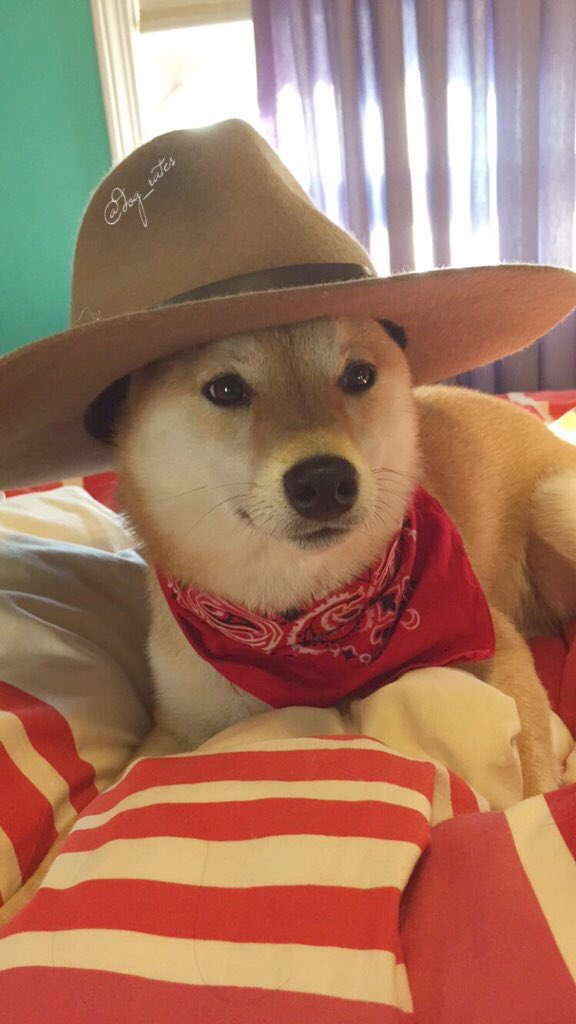 705428427625635840
    

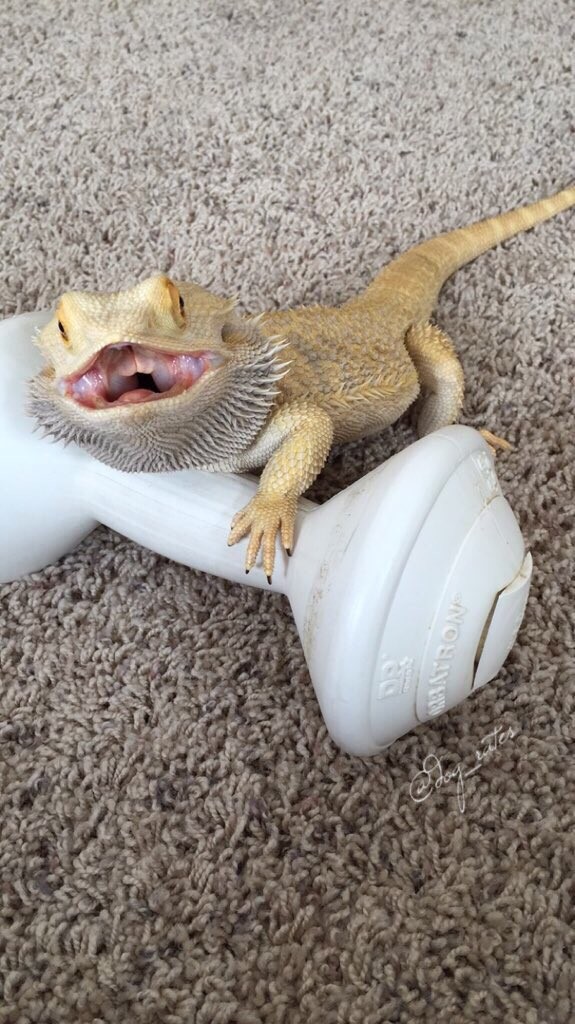

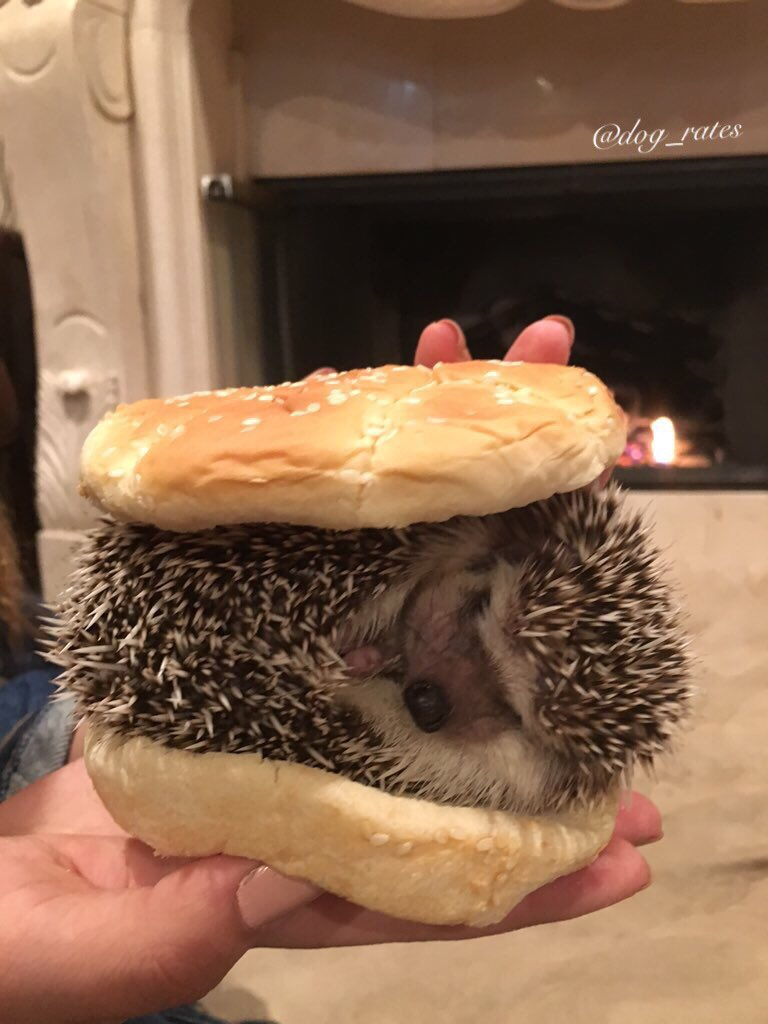

upon the examination of the  the tweet text, we can obeserve the following:

Some dogs were wrongly classified, but the appropriate dog stage is in the tweet text and image url are:
    '674793399141146624':'pupper'
    '678643457146150913':'pupper'
    '684940049151070208':'pupper',
    '669680153564442624':'floofer',
    '669564461267722241':'doggo',
    '705428427625635840':'pupper',
    '676821958043033607':'doggo',
    '715342466308784130':'pupper'
    '724405726123311104': 'pupper'
'686749460672679938'&'699088579889332224'are not dogs. as shown in the image below. We will remove these records.

In [56]:
# Remove the records with ids '686749460672679938',& '699088579889332224'
filter = df_master_clean['tweet_id'].isin(['686749460672679938', '699088579889332224'])
#drop the filter rows
df_master_clean=df_master_clean[~filter]

# Correct the erroneously categorized records
correct_dict = { 
    '674793399141146624':'pupper',
    '678643457146150913':'pupper',
    '684940049151070208':'pupper',
    '669680153564442624':'floofer',
    '669564461267722241':'doggo',
    '705428427625635840':'pupper',
    '676821958043033607':'doggo',
    '715342466308784130':'pupper',
    '724405726123311104': 'pupper'
}

for key in correct_dict.keys():
    df_master_clean.loc[df_master_clean['tweet_id'] == key, 'dog_stage'] = correct_dict[key]

### Test

In [57]:
# Check if the filter record has been dropped
df_master_clean[filter]


C:\Users\USER\AppData\Local\Temp\ipykernel_8772\2618290396.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_master_clean[filter]


Empty DataFrame
Columns: [tweet_id, tweet_date, rating_numerator, rating_denominator, dog_name, doggo, floofer, pupper, puppo, tweet_source, tweets_text, tweet_url, image_url, image_number, dog_breed, confidence_probabilty, retweets, likes, dog_stage]
Index: []

### Code:

In [58]:
# handle missing values
df_master_clean.loc[df_master_clean.dog_stage == '', 'dog_stage'] = np.nan

In [59]:
#change datatype of dog_stage to category
df_master_clean['dog_stage']=df_master_clean.dog_stage.astype('category')

# change dog stage category to tittle case.
df_master_clean.dog_stage=df_master_clean.dog_stage.apply(lambda x: x.title())
#drop columns not needed
df_master_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

### Test

In [60]:
df_master_clean.dog_stage.value_counts()

Pupper          204
Doggo            64
Puppo            22
Doggopupper       8
Floofer           8
Doggofloofer      1
Doggopuppo        1
Name: dog_stage, dtype: int64

In [61]:
# Verify the datatype in the stage column
df_master_clean.dtypes

tweet_id                              object
tweet_date               datetime64[ns, UTC]
rating_numerator                       int64
rating_denominator                     int64
dog_name                              object
tweet_source                          object
tweets_text                           object
tweet_url                             object
image_url                             object
image_number                           int64
dog_breed                             object
confidence_probabilty                 object
retweets                               int64
likes                                  int64
dog_stage                           category
dtype: object

The data type has changed successfully and the unwanted columns dropped.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
# save cleaned master dataset to CSV
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize your wrangled data. 

In [63]:
# read our twitter_archive_master.csv into data frame df_master
df_master_archive = pd.read_csv('twitter_archive_master.csv')

In [64]:
df_master_archive.sample(3)

tweet_id                 tweet_date  rating_numerator  \
529   776813020089548800  2016-09-16 16:00:31+00:00                12   
130   857989990357356544  2017-04-28 16:08:49+00:00                12   
1700  670061506722140161  2015-11-27 02:08:07+00:00                11   

      rating_denominator dog_name        tweet_source  \
529                   10  Solomon  Twitter for iPhone   
130                   10    Rosie  Twitter for iPhone   
1700                  10     Liam  Twitter for iPhone   

                                                                                                                                  tweets_text  \
529                     Meet Solomon. He was arrested for possession of adorable and attempted extra pats on the head. 12/10 would post bail    
130   This is Rosie. She was just informed of the walk that's about to happen. Knows there are many a stick along the way. 12/10 such excite    
1700                    This is Liam. He has a particular set of skills. He will look for you, he will find you, and he will kill you. 11/10    

                    tweet_url  \
529   https://t.co/nFqLaOLUQA   
130   https://t.co/sOl7cFaP5X   
1700  https://t.co/uQMFKv1vjn   

                                            image_url  image_number  \
529   https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg             1   
130   https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg             1   
1700  https://pbs.twimg.com/media/CUyJYk1WoAMPROb.jpg             1   

              dog_breed confidence_probabilty  retweets  likes dog_stage  
529          Toy Poodle               0.51661      1110   4595       NaN  
130      French Bulldog               0.43258      2259  14451       NaN  
1700  Italian Greyhound              0.329339       288    665       NaN

### Insights:
1. What are the top 10 dog breed that are most likes
2. What dog stage has the most likes and retweets
3. Is there any relationship between likes and retweets?

##### Insight #1:  What are the top 10 dog breed interms of most likes?

In [65]:
#filter out dog_breed ='Unknown Breed' and dog_stage='Not specified'
selected_breeds =df_master_archive.loc[(df_master_archive.dog_breed !='Unknown Breed')].reset_index(drop=True)
#1. What is the most popular dog breed interns of total likes
Top10_most_popular_breeds = selected_breeds.groupby('dog_breed').sum()['likes'].nlargest(10)
'''convert top10 object to data frame using the pd.DataFrame and the zip functions'''
df_Top10_most_popular_breeds=pd.DataFrame(list(zip(Top10_most_popular_breeds.index,Top10_most_popular_breeds.values)),columns=['Dog breed','Total likes'])
df_Top10_most_popular_breeds

Dog breed  Total likes
0    Golden Retriever      1654990
1  Labrador Retriever       953804
2            Pembroke       872347
3           Chihuahua       636368
4      French Bulldog       508627
5             Samoyed       391756
6      Cocker Spaniel       336872
7                 Pug       316819
8                Chow       292524
9          Toy Poodle       273724

##### visualual for insight #1:

In [66]:
#create for folder to store our visuals
if not os.path.exists('visuals'):
    os.makedirs('visuals')
#Bar plot for Total Likes Per Predicted Dog Breed
ax = sbn.barplot(x = "Dog breed", y = "Total likes", data = df_Top10_most_popular_breeds,
                      palette = 'hls')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title("Total Likes Per Predicted Dog Breed")
'''show only the left and bottom axis line'''
sbn.despine(left = False, bottom = False)

#### insight #2: What dog stage has the most likes and retweets

In [67]:
#filter for only known dog_state
specified_stage=df_master_archive.query("dog_stage!='null' ").reset_index(drop=True)
#aggregate by dog_stage
groups=specified_stage.groupby('dog_stage').agg({'likes': "mean",'retweets':"mean"})
top_stage=groups.nlargest(n=5, columns=['likes','retweets']).round()
print(top_stage);

                likes  retweets
dog_stage                      
Doggopuppo    41809.0   16076.0
Puppo         19504.0    5302.0
Doggo         17312.0    5974.0
Doggofloofer  14797.0    2784.0
Doggopupper   12670.0    3708.0


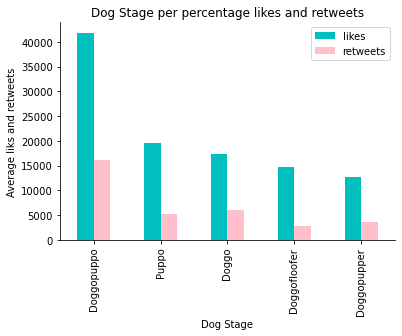

In [68]:
# create stacked bar chart for dog_state
top_stage.plot(kind='bar', stacked=False, color=['c', 'pink'])
 # Add Title and Labels
plt.title('Dog Stage per percentage likes and retweets')
plt.xlabel('Dog Stage')
plt.ylabel('Average liks and retweets')
sbn.despine(left = False, bottom = False)

#### Insight #3:  Is there any relationship between likes and retweets?

In [69]:
#sellect the likes and retweets and find the correlation fators
df_relationship = df_master_archive[['likes', 'retweets']]
corr = df_relationship.corr()
print(corr)

             likes  retweets
likes     1.000000  0.927829
retweets  0.927829  1.000000


#### Visualization of  insight #3

Text(0.5, 1.0, 'Correlation Matrix')

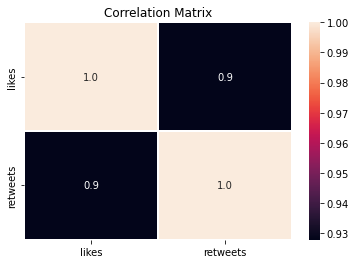

In [70]:
#plot the correlation matrix for likes and retweets
sbn.heatmap(corr, annot=True, linewidths=.4, fmt= '.1f')
plt.title('Correlation Matrix')

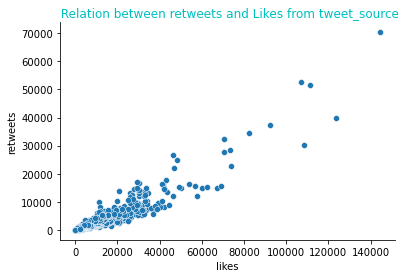

In [71]:
# Plot scatter plot for the likes and retweets
an=sbn.scatterplot(x="likes",
                    y="retweets",
                    palette = 'hls',
                    data=df_master_archive)
'''set the title and the position of the legend'''                                   
tit=an.set_title(" Relation between retweets and Likes from tweet_source")
plt.setp(tit, color='c') 
sbn.despine(left = False, bottom = False)
plt.savefig('visuals/fig4_scatterplot.png')


In [82]:
pd.set_option("display.max_colwidth",50)
df_master_archive.sample(2).T

1397  \
tweet_id                                              676776431406465024   
tweet_date                                     2015-12-15 14:50:49+00:00   
rating_numerator                                                      10   
rating_denominator                                                    10   
dog_name                                                            None   
tweet_source                                          Twitter for iPhone   
tweets_text            When someone yells "cops!" at a party and you ...   
tweet_url                                        https://t.co/4rMZi5Ca1k   
image_url              https://pbs.twimg.com/ext_tw_video_thumb/67677...   
image_number                                                           1   
dog_breed                                                  Unknown Breed   
confidence_probabilty                                                  0   
retweets                                                            1796   
likes                                                               4504   
dog_stage                                                            NaN   

                                                                    251   
tweet_id                                              829449946868879360  
tweet_date                                     2017-02-08 22:00:52+00:00  
rating_numerator                                                      11  
rating_denominator                                                    10  
dog_name                                                            None  
tweet_source                                          Twitter for iPhone  
tweets_text            Here's a stressed doggo. Had a long day. Many ...  
tweet_url                                        https://t.co/fmRS43mWQB  
image_url                https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg  
image_number                                                           1  
dog_breed                                             Labrador Retriever  
confidence_probabilty                                           0.315163  
retweets                                                            1854  
likes                                                               9846  
dog_stage                                                          Doggo

In [ ]:
`